<a href="https://colab.research.google.com/github/yonandaputri/TA_GRNN/blob/master/pyGRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
!pip install pyGRNN

In [324]:
import pandas as pd
import numpy as np 
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, GridSearchCV

from pyGRNN import GRNN #imports the GRNN regressor module
from pyGRNN import feature_selection as FS #imports the GRNN feature selector module

In [307]:
# LOAD DATA
dataset = pd.read_excel("https://github.com/yonandaputri/TA_GRNN/raw/master/realestate.xlsx")
dataset.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [308]:
dataset = dataset.drop('No', axis = 1)
# df = df.drop('X5', axis = 1)
# df = df.drop('X6', axis = 1)
# df = df.drop('Y', axis = 1)
# df = df.round({'X1': 3, 'X2': 1, 'X3': 3, 'X5': 3, 'X6': 3})
dataset.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [309]:
# SPLIT DATA
X = dataset.drop(["Y"], axis = 1).values
Y = dataset['Y'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(
    preprocessing.minmax_scale(X), 
    preprocessing.minmax_scale(Y.reshape(-1,1)), 
    test_size=0.2
)

featnames=list(dataset.drop(["Y"], axis=1).columns)
print(X)
print(featnames)

y_test.shape

[[2012.9166667   32.          84.87882     10.          24.98298
   121.54024  ]
 [2012.9166667   19.5        306.5947       9.          24.98034
   121.53951  ]
 [2013.5833333   13.3        561.9845       5.          24.98746
   121.54391  ]
 ...
 [2013.25        18.8        390.9696       7.          24.97923
   121.53986  ]
 [2013.           8.1        104.8101       5.          24.96674
   121.54067  ]
 [2013.5          6.5         90.45606      9.          24.97433
   121.5431   ]]
['X1', 'X2', 'X3', 'X4', 'X5', 'X6']


(83, 1)

Text(0.5, 0, 'Price of House')

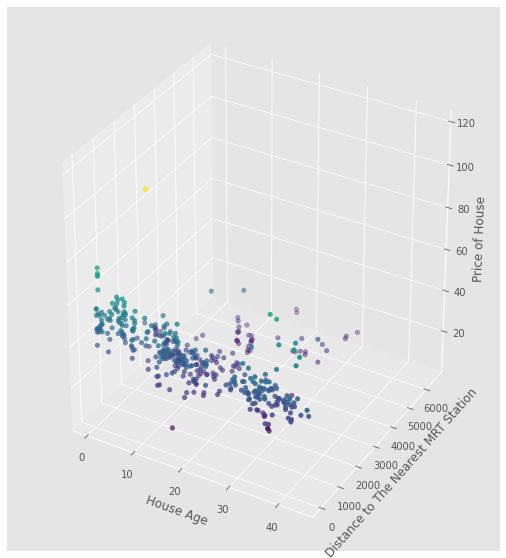

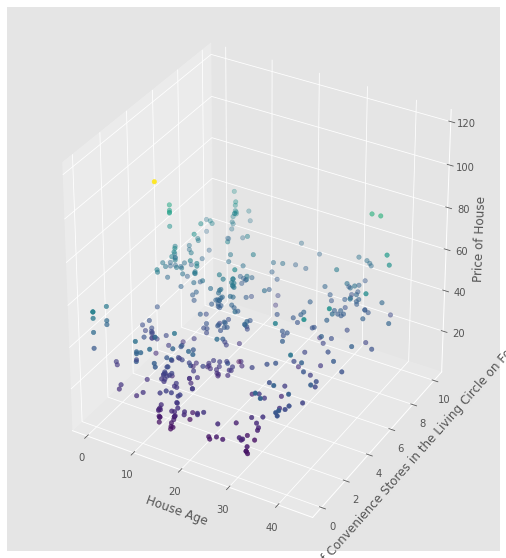

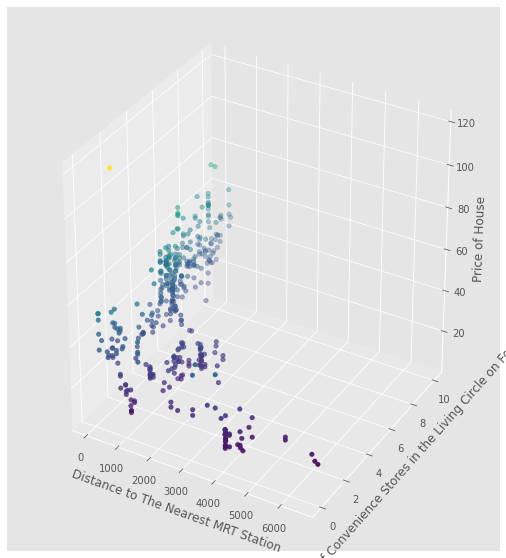

In [277]:
from mpl_toolkits.mplot3d import Axes3D



td = dataset['X1']
ha = dataset['X2']
d = dataset['X3']
nc = dataset['X4']
harga = dataset['Y']

# PLOT X = House Age, Y = Distance to The Nearest MRT Station, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(131, projection='3d')
ax.scatter(ha, d, harga, c=harga, marker='o')
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to The Nearest MRT Station')
ax.set_zlabel('Price of House')

# PLOT X = House Age, Y = Number of Convenience Stores, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(132, projection='3d')
ax.scatter(ha, nc, harga, c=harga, marker='o')
ax.set_xlabel('House Age')
ax.set_ylabel('Number of Convenience Stores in the Living Circle on Foot')
ax.set_zlabel('Price of House')

# PLOT X = Distance to The Nearest MRT Station, Y = Number of Convenience Stores, Z = Price
fig = plt.figure(figsize=[30,10])
ax = fig.add_subplot(133, projection='3d')
ax.scatter(d, nc, harga, c=harga, marker='o')
ax.set_xlabel('Distance to The Nearest MRT Station')
ax.set_ylabel('Number of Convenience Stores in the Living Circle on Foot')
ax.set_zlabel('Price of House')

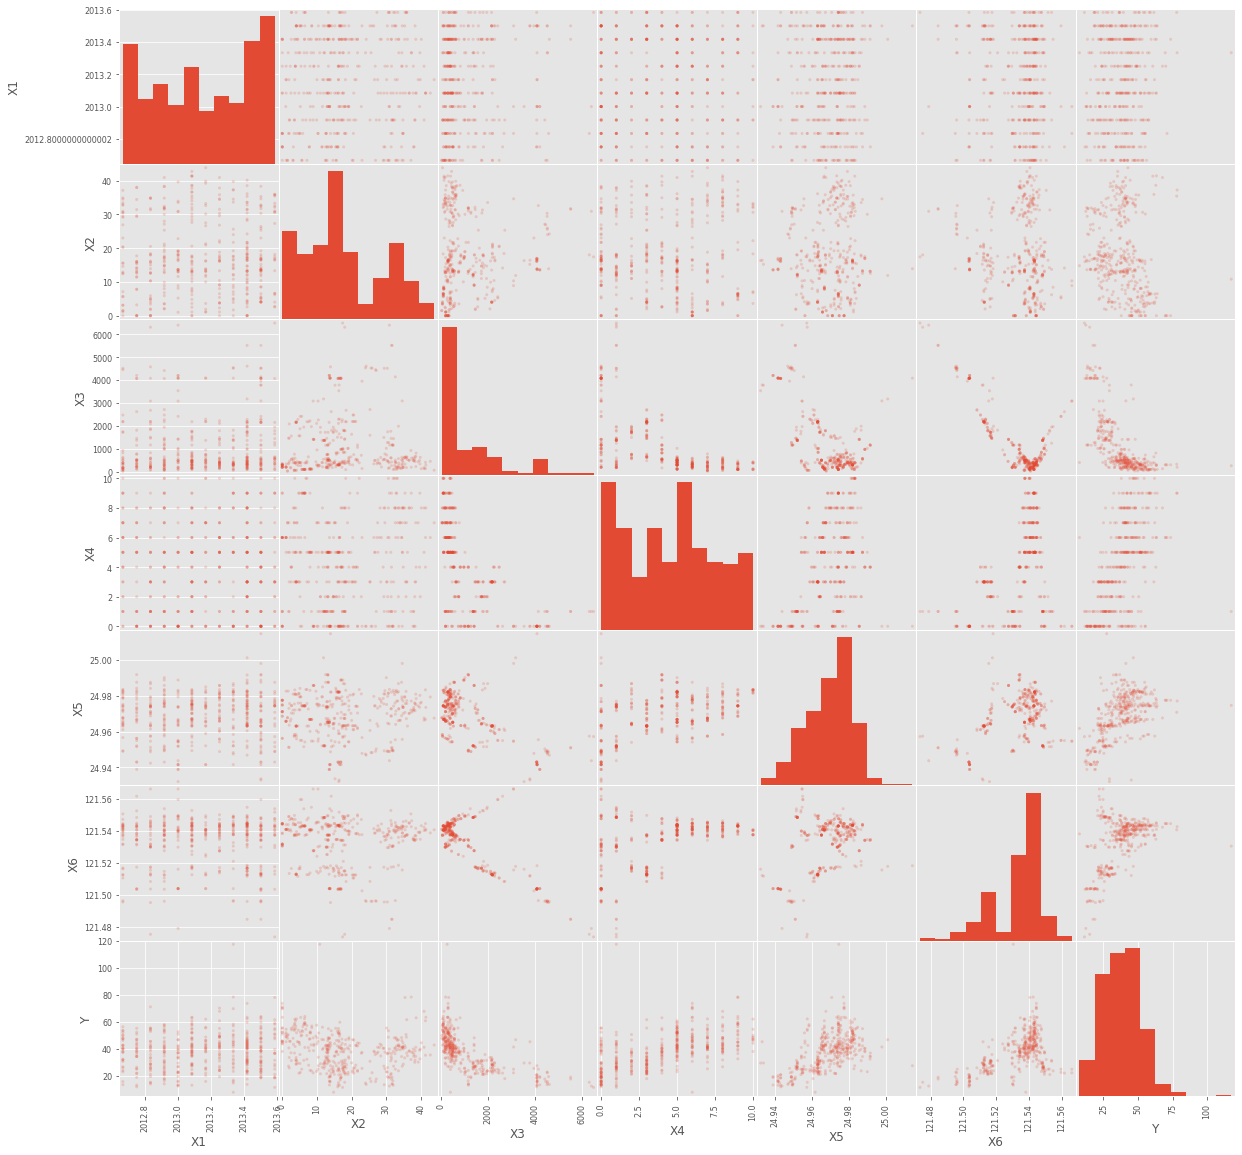

In [278]:
# SCATTERPLOT MATRIX

pd.plotting.scatter_matrix(dataset, alpha=0.2, figsize=(20,20))
plt.show()


> **Feature Selection with Isotropic Selector**

Searching relatidness for feature 0
Best subset is: ['X2']
Searching relatidness for feature 1
Best subset is: ['X4', 'X5', 'X6']
Searching relatidness for feature 2
Best subset is: ['X4', 'X5', 'X6']
Searching relatidness for feature 3
Best subset is: ['X2', 'X3', 'X5', 'X6']
Searching relatidness for feature 4
Best subset is: ['X2', 'X3', 'X4', 'X6']
Searching relatidness for feature 5
Best subset is: ['X3', 'X4', 'X5']
Time to complete the search [s]: 0.5108394622802734


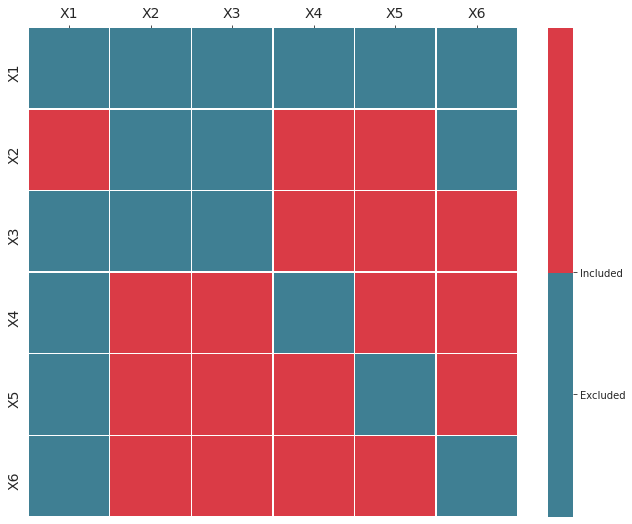

In [315]:
IsotropicSelector = FS.Isotropic_selector()

start = time.time()
IsotropicSelector.relatidness(X_train, feature_names=featnames, strategy = 'ffs')
IsotropicSelector.plot_(featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Select Features using three strategies : the exhaustive search, forward and backward feature selection.

In [316]:
print('Selecting the best subset of features using a forward fs strategy:')
start = time.time()
IsotropicSelector.ffs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a forward fs strategy:
Best subset is: ['X2', 'X3', 'X4', 'X5']
Time to complete the search [s]: 0.08874368667602539


In [317]:
print('Selecting the best subset of features using a backward fs strategy:')
start = time.time()
IsotropicSelector.bfs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a backward fs strategy:
Best subset is: ['X5', 'X4', 'X3', 'X2']
Time to complete the search [s]: 0.07218790054321289


In [318]:
print('Selecting the best subset of features using an exhaustive search:')
start = time.time()
IsotropicSelector.es(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using an exhaustive search:
Exploring the 63 possible combination of features...
The best subset of features is ['X2', 'X3', 'X4', 'X5']
Time to complete the search [s]: 0.2590923309326172


Feat_selection, which automatically classifies the features into relevant, irrelevant and redundant.

In [319]:
print('Performing a complete feature selection from scratch:')
start = time.time()
IsotropicSelector.feat_selection(X_train, y_train, feature_names=featnames, strategy = 'ffs')
print('Time to complete the feature selection [s]: ' + str(time.time() - start))

Performing a complete feature selection from scratch:
Searching relevant features...
Best subset is: ['X2', 'X3', 'X4', 'X5']
Searching the best subset to predict feature 1
Best subset is: ['X4', 'X5', 'X6']
[0, 1, 2]
Searching the best subset to predict feature 2
Best subset is: ['X4', 'X5', 'X6']
[0, 1, 2]
Searching the best subset to predict feature 3
Best subset is: ['X2', 'X3', 'X5', 'X6']
[0, 3]
Searching the best subset to predict feature 4
Best subset is: ['X2', 'X3', 'X4', 'X6']
[0, 4]
Research completed!
The relevant features are: ['X2', 'X3', 'X4', 'X5']
The redundant features are: ['X6']
The irrelevant features are: ['X1']
Time to complete the feature selection [s]: 0.31934547424316406


Without Isotropic Selector

In [310]:
# creating instance of object
GRNN = GRNN()

# setting up the parameters for GridSearchCV
params_GRNN = {'kernel':["RBF"],
             'sigma' : list(np.arange(0.1, 4, 0.01)),
             'calibration' : ['None']
              }

# GridSearchCV tries to find best parameters for above
grid_GRNN = GridSearchCV(estimator=GRNN,
                       param_grid=params_GRNN,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs = -1
                       )
# training the model
grid_GRNN.fit(X_train, y_train.ravel())

# From models created by GridSearchCV we get the best options we have
best_model = grid_GRNN.best_estimator_

# with the best model we try to predict our test data
y_pred = best_model.predict(X_test)

# to calculate performance measure the error with MSE
mse_GRNN = MSE(y_test, y_pred)
print('MSE : ' + str(mse_GRNN))

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:    2.1s


MSE : 0.0044354835955905374


[Parallel(n_jobs=-1)]: Done 1950 out of 1950 | elapsed:    3.2s finished


In [311]:
y_pred = y_pred.reshape(-1,1)

In [312]:
df = pd.DataFrame({'Actual' : y_test[:, 0],'Predicted': y_pred[:, 0]})
df.head()

,Actual,Predicted
0,0.190173,0.265422
1,0.331210,0.343762
2,0.280255,0.360598
3,0.354868,0.268837
4,0.182894,0.162734


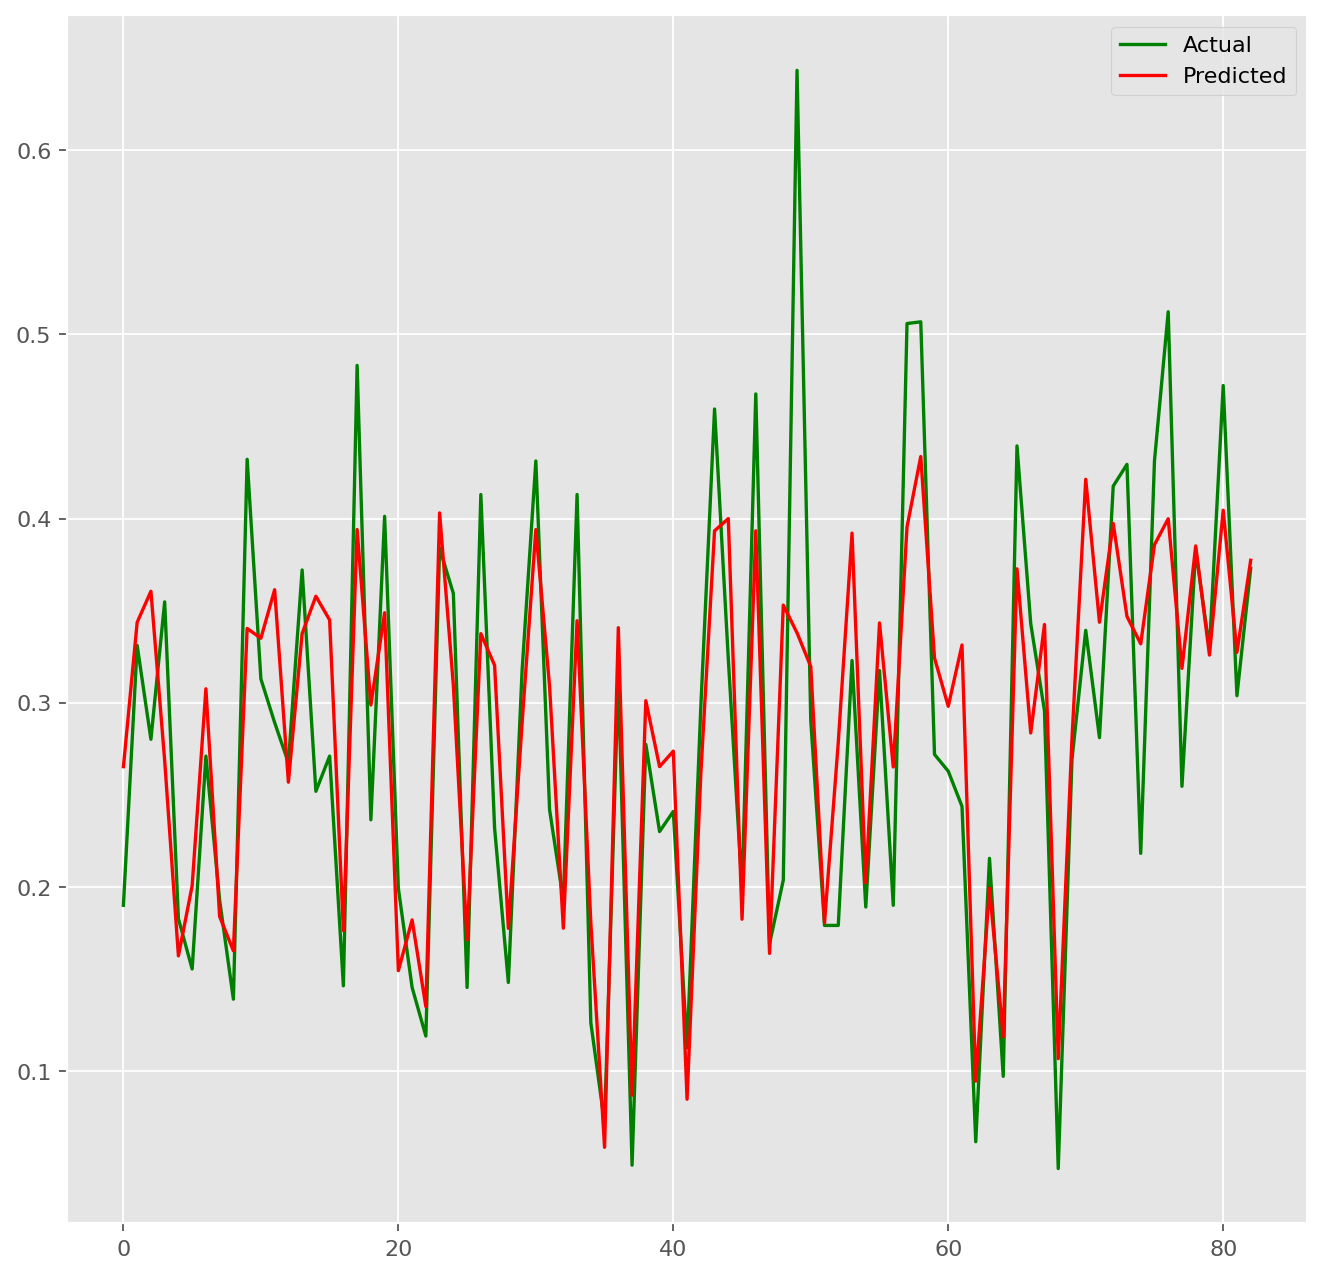

In [313]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(num=None, figsize=(10, 10), dpi=160, facecolor='w', edgecolor='w')

plt.style.use('ggplot')
plt.plot(df['Actual'], 'g', label = 'Actual')
plt.plot(df['Predicted'], 'r', label = 'Predicted')

plt.legend()
plt.show()

With Isotropic Selector

In [320]:
best_set = IsotropicSelector.best_inSpaceIndex
X_train_BestSet = X_train[:,best_set]
X_test_BestSet = X_test[:,best_set]

# Instantiate the estimator
IGRNN = GRNN()
# Define the parameters for a GridSearch CV and fit the model
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1,
                          n_jobs = -1
                          )
grid_IGRNN.fit(X_train_BestSet, y_train.ravel())
# Use the best model to perform prediction, and compute mse
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_test_BestSet)
mse_IGRNN = MSE(y_test, y_pred)
print('MSE with IGRNN (after feature selection): ' + str(mse_IGRNN))

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    2.7s


MSE with IGRNN (after feature selection): 0.004347836345629729


[Parallel(n_jobs=-1)]: Done 1950 out of 1950 | elapsed:    3.1s finished


In [321]:
y_pred = y_pred.reshape(-1,1)

In [322]:
df = pd.DataFrame({'Actual' : y_test[:, 0],'Predicted': y_pred[:, 0]})
df.head()

,Actual,Predicted
0,0.190173,0.329130
1,0.331210,0.335224
2,0.280255,0.365166
3,0.354868,0.308248
4,0.182894,0.191903


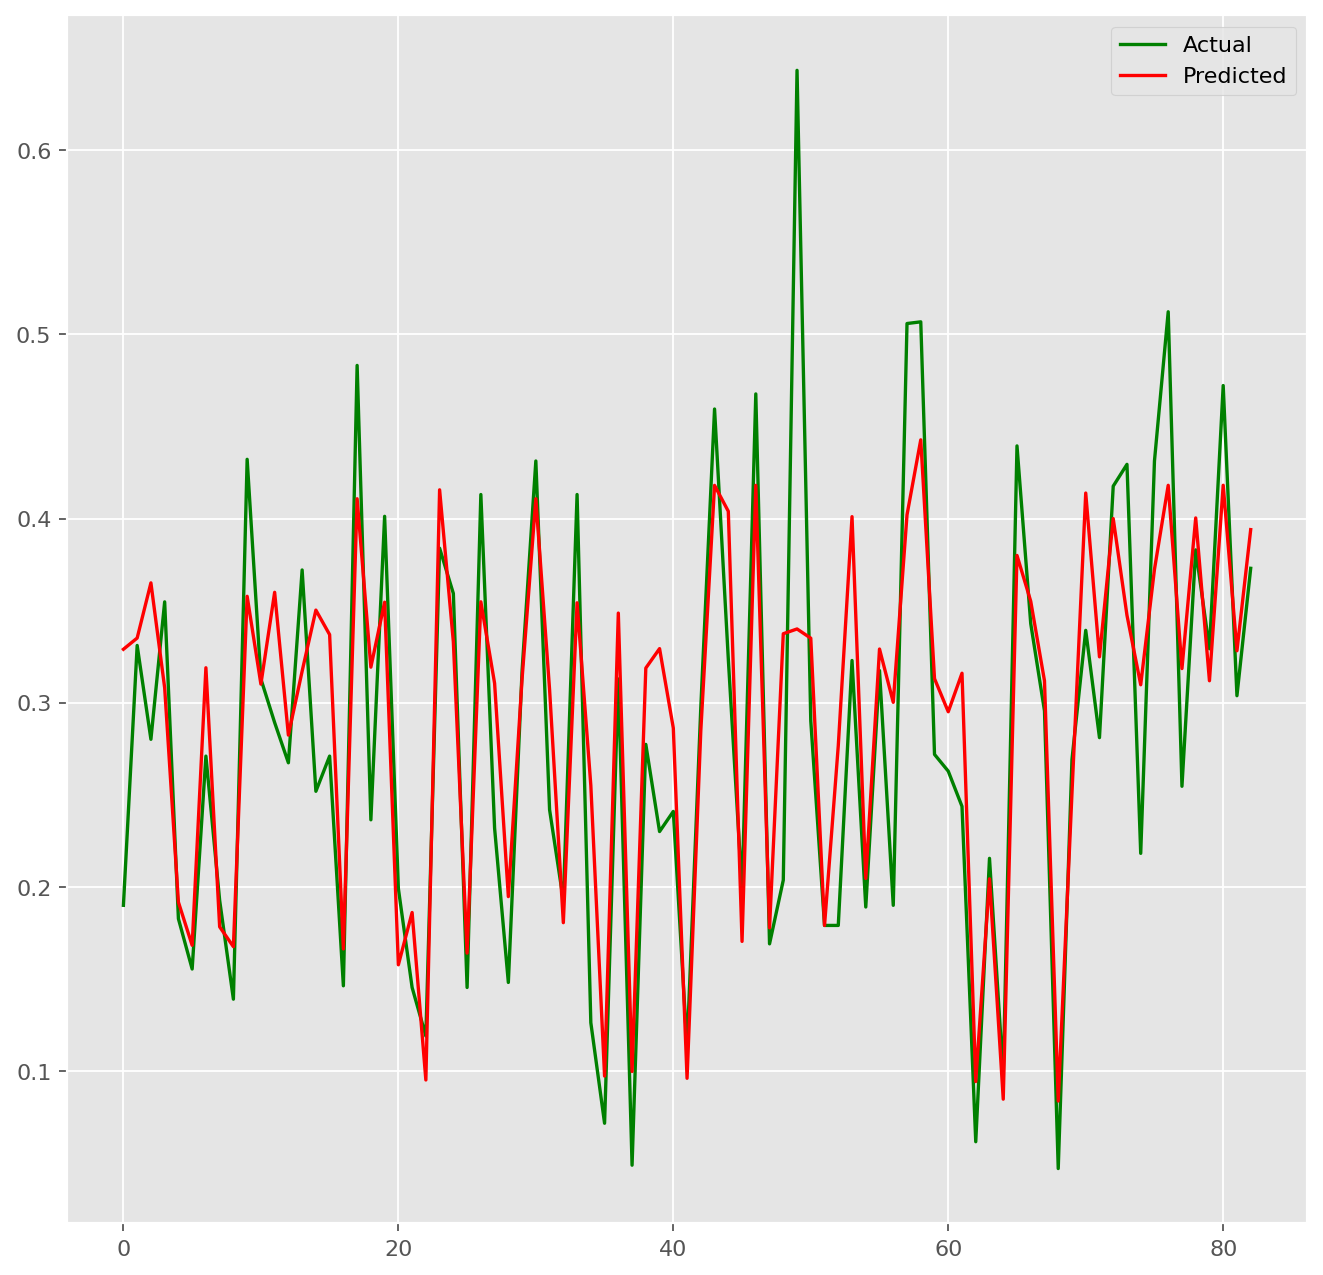

In [323]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(num=None, figsize=(10, 10), dpi=160, facecolor='w', edgecolor='w')

plt.style.use('ggplot')
plt.plot(df['Actual'], 'g', label = 'Actual')
plt.plot(df['Predicted'], 'r', label = 'Predicted')

plt.legend()
plt.show()


> **Feature Selection with Isotropic Selector**


In [326]:
AnisotropicSelector = FS.Anisotropic_selector()
start = time.time()
AnisotropicSelector.max_dist(X_train, y_train.ravel(), feature_names=featnames)
print('Time to complete the feature selection [s]: ' + str(time.time() - start))

Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.14156901]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

Gradient search concluded. The optimum sigma is [0.44176128 0.09085209 0.03308379 7.00875565 0.06409867 4.29415573]
Best subset is: ['X1', 'X2', 'X3', 'X5']
Time to complete the feature selection [s]: 3.6325247287750244


In [328]:
AGRNN = GRNN()
AGRNN.fit(X_train, y_train.ravel())
sigma=AGRNN.sigma 
y_pred = AGRNN.predict(X_test)
mse_AGRNN = MSE(y_test, y_pred)
print('MSE with IGRNN (with "embedded" feature selection): ' + str(mse_AGRNN))

Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.14156901]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

Gradient search concluded. The optimum sigma is [0.44176128 0.09085209 0.03308379 7.00875565 0.06409867 4.29415573]
MSE with IGRNN (with "embedded" feature selection): 0.004005478911319548


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra